# <center> <font color= #000047>Aprendizaje No supervizado: Kmeans


## Introducción


K-Means es un algoritmo no supervisado de Clustering. Se utiliza cuando tenemos un montón de datos sin etiquetar. El objetivo de este algoritmo es el de encontrar “K” grupos (clusters) entre los datos crudos. 

**¿Cómo funciona?**

El algoritmo trabaja iterativamente para asignar a cada “muestra” uno de los “K” grupos basado en sus características. Son agrupados en base a la similitud de sus features (las columnas). Como resultado de ejecutar el algoritmo tendremos:


> Los `“centroids”` de cada grupo que serán unas “coordenadas” de cada uno de los K conjuntos qu>e se utilizarán para poder etiquetar nuevas muestras.


Los grupos se van definiendo de manera “orgánica”, es decir que se va ajustando su posición en cada iteración del proceso, hasta que converge el algoritmo. Una vez hallados los centroids deberemos analizarlos para ver cuales son sus características únicas, frente a la de los otros grupos. Estos grupos son las etiquetas que genera el algoritmo.

## Casos de Uso de K-Means

Algunos casos de uso son:

> **Segmentación por Comportamiento:** relacionar el carrito de compras de un usuario, sus tiempos de acción e información del perfil.

> **Categorización de Inventario:** agrupar productos por actividad en sus ventas
Detectar anomalías o actividades sospechosas: según el comportamiento en una web reconocer un troll -o un bot- de un usuario normal


## Algoritmo K-means

El algoritmo utiliza una proceso **iterativo** en el que se van ajustando los grupos para producir el resultado final. Para ejecutar el algoritmo deberemos pasar como entrada el `conjunto de datos` y un valor de `K`. El conjunto de datos serán las características o features para cada punto. Las posiciones iniciales de los K centroids serán asignadas de manera aleatoria de cualquier punto del conjunto de datos de entrada. Luego se itera en dos pasos:

> 1.- **Paso de asignación** $argmin_{c_i \in C} dist(c_i, x)^2$

> 2.- **Paso de actualización del Centroide**  En este paso los centroides de cada grupo son recalculados. Esto se hace tomando una media de todos los puntos asignados en el paso anterior. $c_i = \frac{1}{|s_i|}\sum_{x_i \in s_i} x_i$

El algoritmo itera entre estos pasos hasta cumplir un criterio de detención:
*  si no hay cambios en los puntos asignados a los grupos,
* o si la suma de las distancias se minimiza,
* o se alcanza un número máximo de iteraciones.

El algoritmo converge a un resultado que puede ser el óptimo local, por lo que será conveniente volver a ejecutar más de una vez con puntos iniciales aleatorios para confirmar si hay una salida mejor.



## Criterios de Elección de Grupos

> Criterio del codo

> Criterio del gradiente

## Ejemplo 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [4]:
#%% Generar datos aleatorios
X, Y = make_blobs(n_samples=1500, random_state=5, n_features = 2)
X

array([[-4.4207936 ,  7.90908652],
       [-5.6742539 ,  8.24798888],
       [ 0.15096735,  3.72731887],
       ...,
       [-6.15312156,  7.33253057],
       [-6.20649316,  7.96321396],
       [ 0.8546093 ,  1.95771111]])

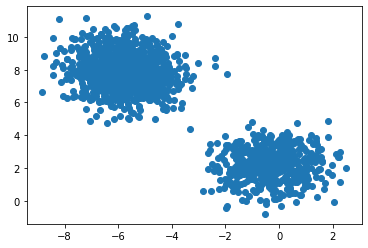

In [5]:
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1])
plt.show()

In [39]:
#%% Aplicar el algoritmo Kmeans
model = KMeans(n_clusters=12, random_state=5, init='random')
model = model.fit(X)
grups = model.predict(X)
centroides = model.cluster_centers_

In [8]:
grups

array([6, 0, 5, ..., 3, 1, 5], dtype=int32)

In [17]:
centroides

array([[-4.79079314,  7.45480191],
       [ 0.41625349,  2.64822415],
       [-1.01621549,  1.75345623],
       [-5.94632684,  9.12049524],
       [-6.56758703,  7.25734045]])

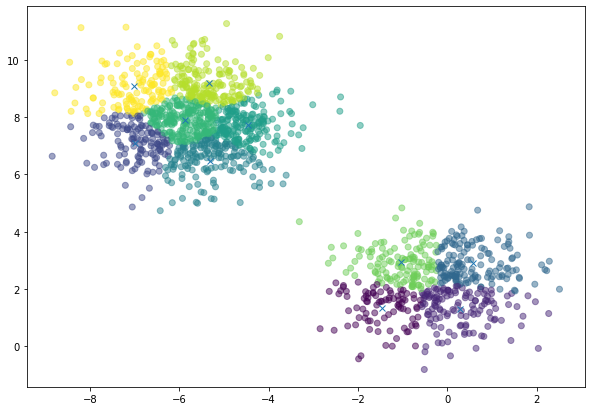

In [35]:
plt.figure(figsize=(10,7))
plt.scatter(X[:,0], X[:,1], c = grups, alpha=0.5)
plt.plot(centroides[:,0], centroides[:,1], 'x')
plt.show()

In [40]:
model.inertia_

765.9597912731056

Text(0, 0.5, 'Inercial')

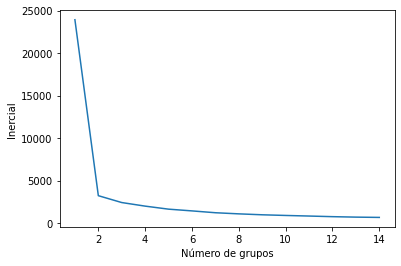

In [41]:
#%% Criterio de selección del codo
ngroup = 15
inercias = np.zeros(ngroup)

for k in np.arange(1,ngroup):
    model = KMeans(n_clusters = k, random_state = 5, init='random')
    model = model.fit(X)
    inercias[k] = model.inertia_

plt.figure(figsize=(6,4))
plt.plot(np.arange(1,ngroup),inercias[1:])
plt.xlabel('Número de grupos')
plt.ylabel('Inercial')

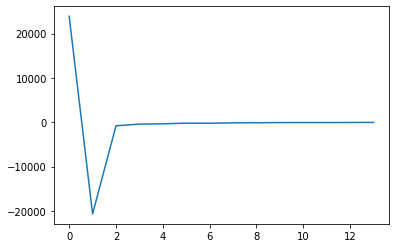

In [42]:
# Criterio del gradiente
plt.plot(np.diff(inercias))


**k = 2**

In [43]:
def criterio_codo_kmeans(ngroup, data):
    '''
    Esta función es para el análisis del criterio del codo para KMeans
    input:
    outpput:
    '''
    inercias = np.zeros(ngroup)

    for k in np.arange(1,ngroup):
        model = KMeans(n_clusters=k, random_state=5, init='random')
        model = model.fit(data)
        inercias[k] = model.inertia_

    
    plt.figure(figsize=(6,4))
    plt.plot(np.arange(1,ngroup), inercias[1:])
    plt.xlabel('Número de grupos')
    plt.ylabel('Inercia')

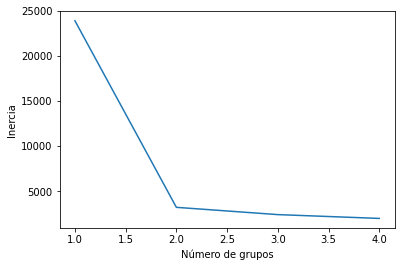

In [44]:
criterio_codo_kmeans(5,X)


In [45]:
def criterio_gradiente_kmeans(ngroup, data):
    '''
    Esta función es para el análisis del criterio del gradiente para KMeans
    input:
    outpput:
    '''
    inercias = np.zeros(ngroup)

    for k in np.arange(1,ngroup):
        model = KMeans(n_clusters=k, random_state=5, init='random')
        model = model.fit(data)
        inercias[k] = model.inertia_

    # Calcular la derivada de las inercias
    gradiente = np.diff(inercias)
    
    plt.figure(figsize=(6,4))
    plt.plot(np.arange(1,ngroup), gradiente) #Plot de los grupos vs derivada de las inercias
    plt.xlabel('Número de grupos')
    plt.ylabel('Inercia')

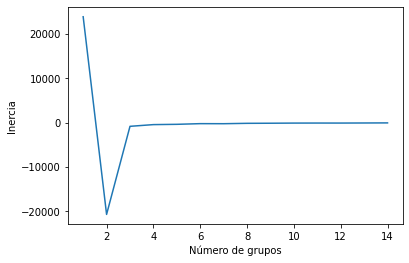

In [46]:
criterio_gradiente_kmeans(15,X)

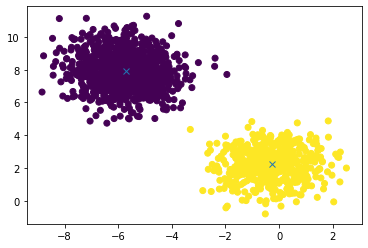

In [47]:
#%% Definiendo el número de grupos optimos
#%% Aplicar el algoritmo Kmeans con 2 grupos
#%% Aplicar el algoritmo Kmeans
model_op = KMeans(n_clusters=2, random_state=5, init='random')
model_op = model_op.fit(X)
grupos = model_op.predict(X)
centroides = model_op.cluster_centers_

plt.figure(figsize=(6,4))
plt.scatter(X[:,0],X[:,1], c=grupos)
plt.plot(centroides[:,0], centroides[:,1], 'x')
plt.show()